<a href="https://colab.research.google.com/github/theAkhileshRai/GitLearn/blob/master/Practice_notebook1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#alexnet

!pip install -U --pre mxnet-cu101mkl  # updating mxnet to at least v1.6
!pip install git+https://github.com/d2l-ai/d2l-en # installing d2l

     |████████████████████████████████| 711.0MB 22kB/s 
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1
  Cloning https://github.com/d2l-ai/d2l-en to /tmp/pip-req-build-80l80z_6
  Running command git clone -q https://github.com/d2l-ai/d2l-en /tmp/pip-req-build-80l80z_6
  Created wheel for d2l: filename=d2l-0.11.4-cp36-none-any.whl size=31866 sha256=b7b0cc7fdb39ffe466c8838ae48e42c6aa2476bff1dd5d2305d90d3fc3764c61
  Stored in directory: /tmp/pip-ephem-wheel-cache-dnnra46_/wheels/82/6f/b8/8422c7ed664272685e3d139b127f89df39d934704a14b2156c
Successfully built d2l


In [0]:
import d2l
from mxnet import np, npx
from mxnet.gluon import nn
npx.set_np()


In [0]:

net = nn.Sequential()
net.add(nn.Conv2D(96,kernel_size = 11,strides=4),
        nn.MaxPool2D(pool_size = (3,3),strides=2),
        nn.Conv2D(256,kernel_size = 5,padding = 2),
        nn.MaxPool2D(pool_size=3,strides=2),
        nn.Conv2D(384,kernel_size = 3,padding=1),
        nn.Conv2D(384,kernel_size = 3,padding=1),
        nn.Conv2D(384,kernel_size = 3,padding=1),
        nn.MaxPool2D(pool_size=3,strides=2),
        nn.Dense(4096),
        nn.Dense(4096),
        nn.Dense(10)
        )

In [4]:
net.load_parameters

<bound method Block.load_parameters of Sequential(
  (0): Conv2D(-1 -> 96, kernel_size=(11, 11), stride=(4, 4))
  (1): MaxPool2D(size=(3, 3), stride=(2, 2), padding=(0, 0), ceil_mode=False, global_pool=False, pool_type=max, layout=NCHW)
  (2): Conv2D(-1 -> 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (3): MaxPool2D(size=(3, 3), stride=(2, 2), padding=(0, 0), ceil_mode=False, global_pool=False, pool_type=max, layout=NCHW)
  (4): Conv2D(-1 -> 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (5): Conv2D(-1 -> 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): Conv2D(-1 -> 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (7): MaxPool2D(size=(3, 3), stride=(2, 2), padding=(0, 0), ceil_mode=False, global_pool=False, pool_type=max, layout=NCHW)
  (8): Dense(-1 -> 4096, linear)
  (9): Dense(-1 -> 4096, linear)
  (10): Dense(-1 -> 10, linear)
)>

In [5]:
batch_size = 128
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=224)

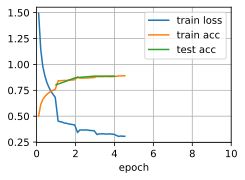

In [0]:
lr, num_epochs = 0.01, 10
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr)   
